# Understanding unemployment in France 

Have you ever wondered where the numbers came from when politicians or the media talk about unemployment ? Being a subject of interest in Western countries, let's try to understand what is happening in terms of unemployment in France. For this, we have retrieved data from [data.gouv](https://www.insee.fr/fr/statistiques/3555153#consulter). 
They represent unemployment data in France in 2017.



## Description of the dataset 

Have a look at the description of the dataset [here](https://www.insee.fr/fr/statistiques/3555153#documentation)

* Import useful libraries
  * pandas 
  * numpy
  * matplotlib 

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load the data from fdeec17.csv

In [45]:
dataset = pd.read_csv('src/fdeec17.csv')

* By doing a [pie-chart](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html), show the share of unemployed, inactive and employed persons in France (from the variable ACTEU). Make sure the following information is displayed : 

  * The percentage of each category 
  * A legend 

In [46]:
dataset.head()

,Unnamed: 0,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,0,2017,1,1,1,2,50,50,2,1,...,30.0,52.0,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,1,2017,1,1,1,2,15,15,2,2,...,42.0,52.0,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2,2017,1,1,1,2,15,15,2,2,...,31.0,52.0,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,3,2017,3,1,1,2,50,50,2,1,...,30.0,52.0,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,4,2017,3,1,1,2,15,15,2,2,...,42.0,52.0,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN


In [47]:
dataset.columns.values

array(['Unnamed: 0', 'ANNEE', 'TRIM', 'CATAU2010R', 'METRODOM', 'TYPMEN7',
       'AGE3', 'AGE5', 'COURED', 'ENFRED', 'NFRRED', 'SEXE', 'ACTEU',
       'ACTEU6', 'ACTIF', 'ACTOP', 'AIDFAM', 'ANCCHOM', 'ANCINACT',
       'CONTACT', 'CREACCP', 'DEM', 'DISPOC', 'GARDEB', 'HALOR',
       'INSCONT', 'MRA', 'MRB', 'MRBBIS', 'MRC', 'MRD', 'MRDBIS', 'MRE',
       'MREC', 'MRF', 'MRG', 'MRGBIS', 'MRH', 'MRI', 'MRJ', 'MRK', 'MRL',
       'MRM', 'MRN', 'MRO', 'MRPASSA', 'MRPASSB', 'MRPASSC', 'MRS',
       'NONDIC', 'NREC', 'NRECA', 'NRECB', 'OCCREF', 'OFFICC', 'OFFRE',
       'PASTRA', 'PASTRB', 'PASTRF', 'PERCREV', 'RABS', 'RAISNREC',
       'RAISNSOU', 'RAISPAS', 'SOU', 'SOUA', 'SOUB', 'SOUC', 'SOUSEMPL',
       'STCHE', 'TEMP', 'TRAREF', 'TYPCONT', 'TYPCONTB', 'CHPUB', 'CSE',
       'CSER', 'CSP', 'CSTOT', 'CSTOTR', 'FONCTC', 'NAFG004UN',
       'NAFG010UN', 'NAFG017UN', 'NAFG021UN', 'NAFG038UN', 'NAFG088UN',
       'PUB3FP', 'QPRC', 'STC', 'CONTRA', 'RDET', 'STAT2', 'STATOEP',
       'STATUT'

In [48]:
dataset['ACTEU'].unique()

array([ 1.,  3.,  2., nan])

In [53]:
chomeurs = dataset['ACTEU'].apply(lambda x:
                               "Actif Occupé" if x==1
                               else "Chômeur" if x == 2
                               else "Inactif" if x==3
                               else "NAN")

print(chomeurs)

0         Actif Occupé
1         Actif Occupé
2         Actif Occupé
3         Actif Occupé
4         Actif Occupé
              ...     
428637         Inactif
428638         Inactif
428639         Inactif
428640         Inactif
428641         Inactif
Name: ACTEU, Length: 428642, dtype: object


In [54]:
pie_chart_data = chomeurs.value_counts()
pie_chart_data

ACTEU
Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: count, dtype: int64

In [50]:
pie_chart_data = dataset.value_counts('ACTEU')
pie_chart_data

ACTEU
3.0    207520
1.0    198054
2.0     21864
Name: count, dtype: int64

In [51]:
explode = (0.2,0.2,0.5,0.1)

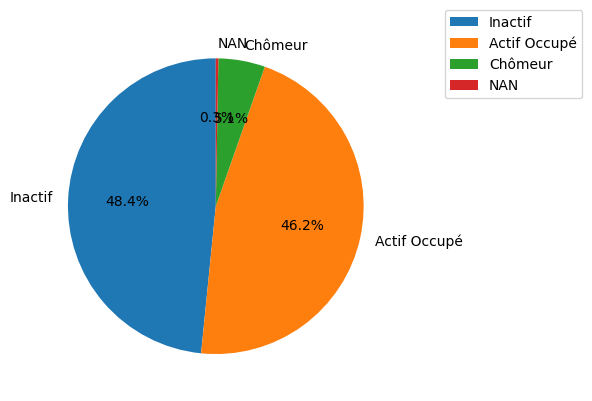

In [65]:
plt.figure()
plt.pie(pie_chart_data.values, labels=pie_chart_data.index,  
       autopct='%1.1f%%',
       shadow=False, 
       startangle=90,
       #explode=explode, 
       #radius=1.5
       )
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


---> The unemployment figure seems low and, if we look at the explanation of the *inactive*, it seems to include a lot of people (students, people not looking for work, etc.).

* Make the same graph on the variable ACTEU6 which is more precise on the type of actives.

In [66]:
chomeurs = dataset['ACTEU6'].apply(lambda x: 
                                
                                "Actif Occupé" if x == 1 
                                else "Chômeur PSERE" if x == 3 
                                else "Autre Chômeur BIT" if x==4 
                                else "Etudiant, élève, stagiaire en formation" if x == 5
                                else "Autres inactifs (dont retraité)" if x == 6
                                else "NAN"
                               
                               )

pie_chart_data = chomeurs.value_counts()

In [67]:
pie_chart_data

ACTEU6
Actif Occupé                               198054
Autres inactifs (dont retraité)            172921
Etudiant, élève, stagiaire en formation     34599
Chômeur PSERE                               20854
NAN                                          1204
Autre Chômeur BIT                            1010
Name: count, dtype: int64

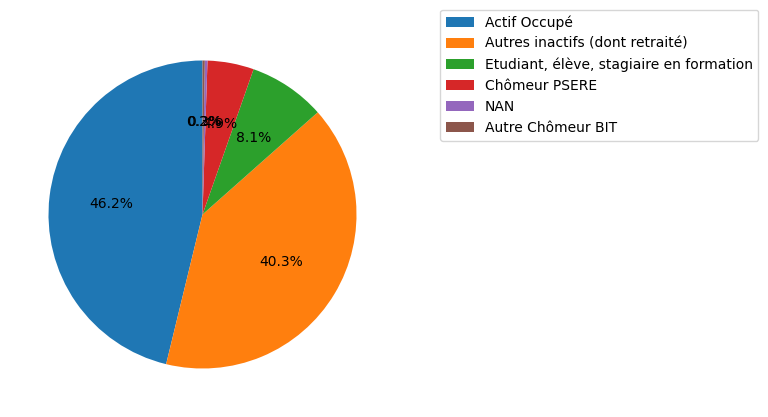

In [74]:
plt.figure(figsize = (10,5))
plt.pie(
    pie_chart_data, 
    autopct = '%1.1f%%',
    shadow = False, 
    startangle = 90,
    #explode = (0.1, 0.1,0.3,0.6,0.8, 1.3),
    #radius = 1.5 
       )

plt.legend(pie_chart_data.index, bbox_to_anchor=(1.1, 1.05))
plt.show()


* By ploting a [stacked bar chart](https://pythonmatplotlibtips.blogspot.com/2018/11/normalized-stacked-barplot-number-percentage-python-matplotlib.html), compare :

  * The ratio *chômeurs* / *Actifs occupés* 
  * The ratio *chômeurs* / *Actifs occupés + Inactifs*

In [75]:
# On recréé les données dont on a besoin 
chomeurs = dataset['ACTEU'].apply(lambda x: 
                               "Actif Occupé" if x==1 
                               else "Chômeur" if x == 2
                               else "Inactif" if x==3 
                               else "NAN")

chart_data = chomeurs.value_counts()
chart_data

ACTEU
Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: count, dtype: int64

In [76]:
chom_actif = chart_data[2] / chart_data[1]
chom_actif_inactif = chart_data[2] / (chart_data[1] + chart_data[0])

data = [chom_actif, chom_actif_inactif]
print("Rapports de chômeurs\n {}".format(data))

Rapports de chômeurs
 [0.11039413493289708, 0.05390878113488537]


/var/folders/1c/xb2wz7j57xs_cv_h1d17grhm0000gp/T/ipykernel_5108/2773633379.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chom_actif = chart_data[2] / chart_data[1]
/var/folders/1c/xb2wz7j57xs_cv_h1d17grhm0000gp/T/ipykernel_5108/2773633379.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chom_actif_inactif = chart_data[2] / (chart_data[1] + chart_data[0])


In [78]:
data_actifs = np.array([1,1]) - data
print("Rapports d'actifs\n {}".format(data_actifs))

Rapports d'actifs
 [0.88960587 0.94609122]


In [79]:
legend = ["Chômeurs / Actifs Occupés", "Chômeurs / Actifs + Inactifs"]
legend

['Chômeurs / Actifs Occupés', 'Chômeurs / Actifs + Inactifs']

In [80]:
plt.text?

Signature:
plt.text(
    x: 'float',
    y: 'float',
    s: 'str',
    fontdict: 'dict[str, Any] | None' = None,
    **kwargs,
) -> 'Text'
Docstring:
Add text to the Axes.

Add the text *s* to the Axes at location *x*, *y* in data coordinates,
with a default ``horizontalalignment`` on the ``left`` and
``verticalalignment`` at the ``baseline``. See
:doc:`/gallery/text_labels_and_annotations/text_alignment`.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None

    .. admonition:: Discouraged

       The use of *fontdict* is discouraged. Parameters should be passed as
       individual keyword arguments or using dictionary-unpacking
       ``text(..., **fontdict)``.

    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Retur

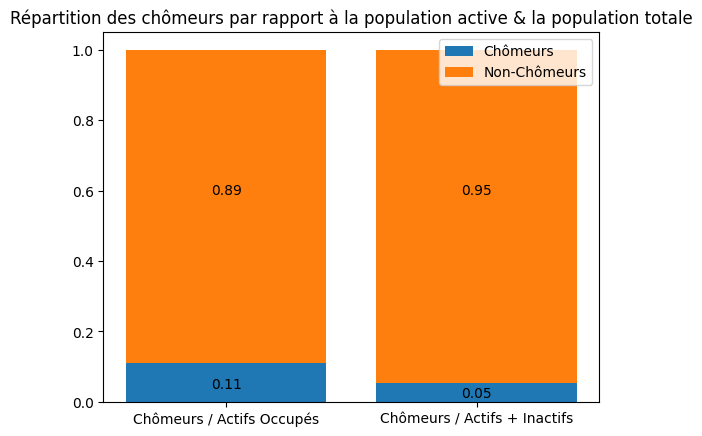

In [81]:
# Create two bar charts who will be surperposed
## Don't forget to use two ax.bar()
## To create legends, we can use ax1.text()
## To create a title, we can yse ax1.set_title()

plt.figure()

plt.bar(legend, 
         data,
        label="Chômeurs")

plt.bar(legend,
        data_actifs, 
        bottom=data,
        label="Non-Chômeurs")

plt.text(legend[0], 0.6, np.round(data_actifs[0],2), ha = "center", va = "center")
plt.text(legend[0], 0.05, np.round(data[0],2), ha = "center", va = "center")

plt.text(legend[1], 0.6, np.round(data_actifs[1],2), ha = "center", va = "center")
plt.text(legend[1], 0.025, np.round(data[1],2), ha = "center", va = "center")

plt.legend()
plt.title("Répartition des chômeurs par rapport à la population active & la population totale")

plt.show()


It seems that we were 11% unemployed among the active (working) population in France in 2017 according to the ILO.

* By creating a [*bar chart*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) again, this time look at the distribution of unemployment seniority. The name of the variable is ANCCHOM

In [82]:
duree_chomage = dataset['ANCCHOM'].apply(lambda x: 
                                       "Moins d'un mois" if x==1 
                                       else "De 1 mois à moins de 3 mois" if x == 2
                                       else "De 3 mois à moins de 6 mois" if x == 3
                                       else "De 3 mois à moins de 6 mois" if x == 3
                                       else "De 6 mois à moins d'un an" if x == 4
                                       else "De 1 an à moins d'un an et demi" if x == 5
                                       else "De 1 an et demi à moins de 2 ans" if x == 6
                                       else "De 2 ans à moins de 3 ans" if x == 7
                                       else "3 ans ou plus" if x == 8
                                       else "NAN")

chart_data = duree_chomage.value_counts()
chart_data

ANCCHOM
NAN                                 406904
3 ans ou plus                         3906
De 6 mois à moins d'un an             3648
De 1 an à moins d'un an et demi       3398
De 1 mois à moins de 3 mois           3270
De 3 mois à moins de 6 mois           3193
De 2 ans à moins de 3 ans             2289
De 1 an et demi à moins de 2 ans      1132
Moins d'un mois                        902
Name: count, dtype: int64

<BarContainer object of 8 artists>

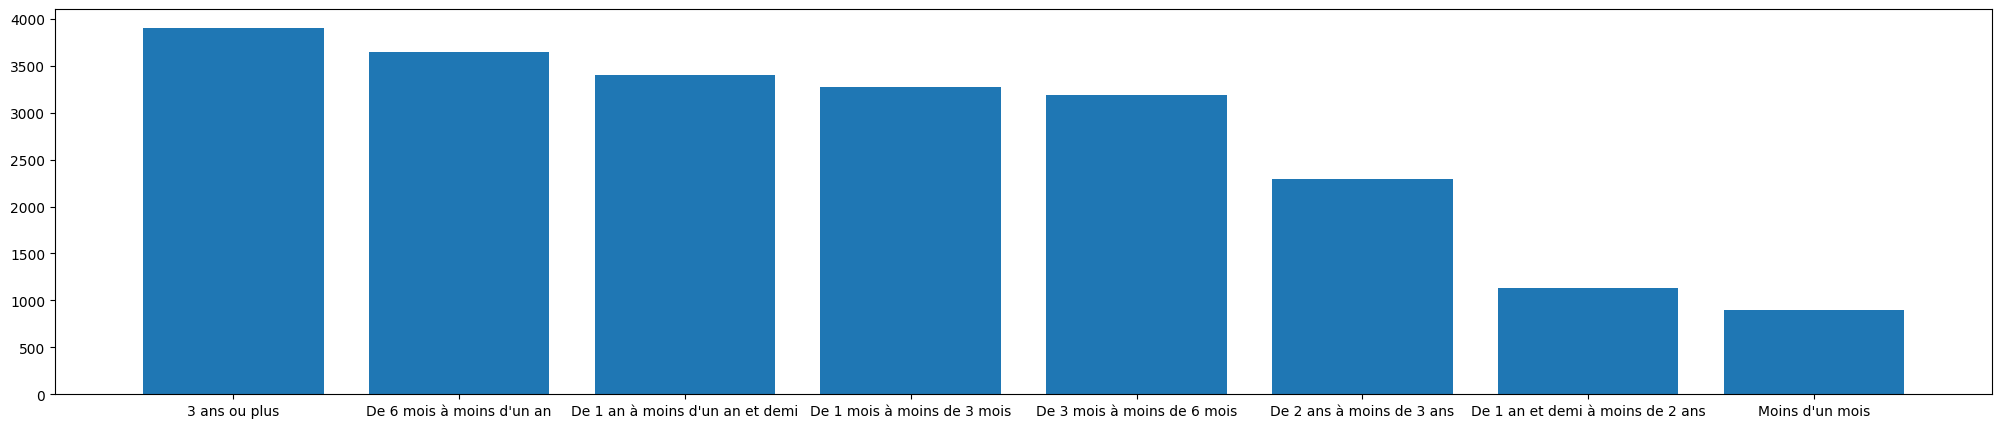

In [83]:
plt.figure(figsize=(25,5))
plt.bar(chart_data.index[1:], chart_data.values[1:])

* The distribution doesn't look good on the bar chart, try doing it again on a piechart. 

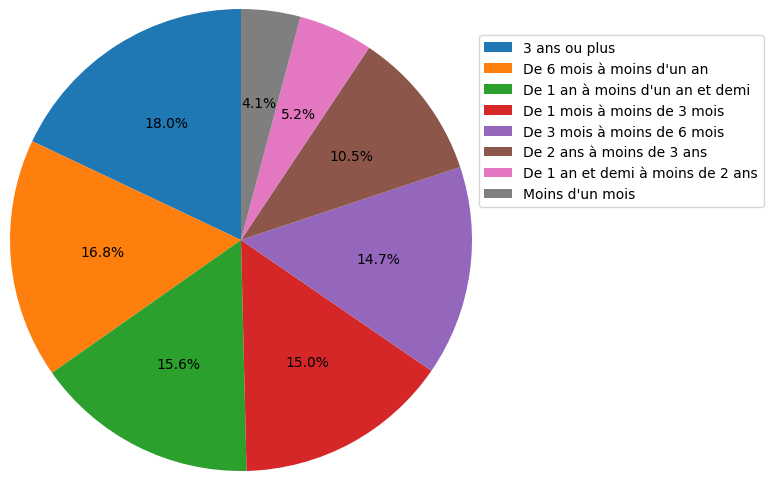

In [84]:
plt.figure(figsize=(10,5))
plt.pie(chart_data[1:], 
       autopct='%1.1f%%',
       shadow=False, 
       startangle=90,
       radius=1.5
       )
plt.legend(chart_data.index[1:], bbox_to_anchor=(1.1, 1.05))
plt.show()


* It would be interesting to see the distribution of people registered with Pôle Emploi or an employment agency among these unemployed people. Look at this distribution thanks to the CONTACT column 
  * Directly remove the NaN from your chart

In [85]:
dataset['CONTACT']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
428637   NaN
428638   NaN
428639   NaN
428640   NaN
428641   NaN
Name: CONTACT, Length: 428642, dtype: float64

In [86]:
contact = dataset['CONTACT'].apply(lambda x: 
                                       "Oui" if x == 1 
                                       else "Non" if x == 2
                                       else "NAN")

chart_data = contact.value_counts()
chart_data

CONTACT
NAN    399514
Non     15984
Oui     13144
Name: count, dtype: int64

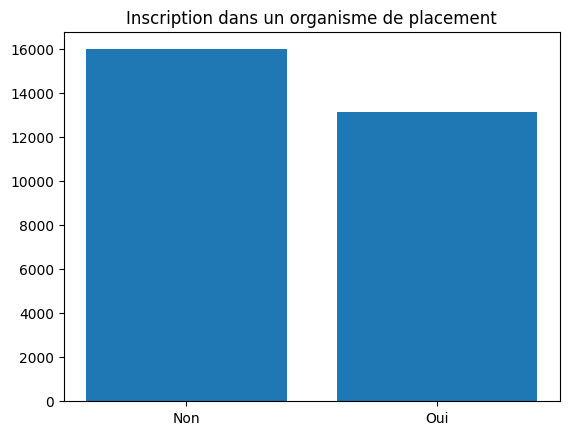

In [87]:
plt.bar(chart_data[1:].index, chart_data[1:].values)
plt.title("Inscription dans un organisme de placement")
plt.show()

* Regardons ce qui pousse les français à changer d'emploi, grâce à la colonne CREACCP, crééz un bar chart horizontale qui va permettre de connaitre les principales raisons de changement d'emploi des français. 

In [ ]:
creaccp = dataset['CREACCP'].apply(lambda x: 
                                
                                "Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)" if x == 1 
                                else "Désire un emploi plus intéressant" if x == 2
                                else "Veut un emploi plus stable (CDI)" if x == 3
                                else "Veut travailler plus d'heures" if x == 4
                                else "Désire un travail avec un rythme horaire plus adapté ou plus modulable" if x == 5
                                else "Désire des conditions de travail moins pénibles ou plus adaptées à sa santé" if x == 6
                                else "Désire augmenter ses revenus" if x == 7
                                else "Désire diminuer son temps de transport" if x == 8
                                else "Doit ou veut déménager" if x == 9
                                else "Veut s'installer à son compte" if x == 10
                                else "Veut changer de métier ou de secteur" if x == 11
                                else "Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles" if x == 12
                                else "NAN")

chart_data = creaccp.value_counts(ascending=True)
chart_data

Doit ou veut déménager                                                                   216
Veut s'installer à son compte                                                            354
Désire diminuer son temps de transport                                                   598
Désire un travail avec un rythme horaire plus adapté ou plus modulable                  1102
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles          1223
Veut changer de métier ou de secteur                                                    1392
Veut travailler plus d'heures                                                           1404
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)      1582
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé             1820
Veut un emploi plus stable (CDI)                                                        2462
Désire un emploi plus intéressant                                     

In [ ]:
s = np.sum(chart_data.values[:-1])
print(s)

21707


In [ ]:
repartition = [np.round(element/s*100,2) for element in chart_data.values[:-1]]
repartition

[1.0, 1.63, 2.75, 5.08, 5.63, 6.41, 6.47, 7.29, 8.38, 11.34, 12.8, 31.21]

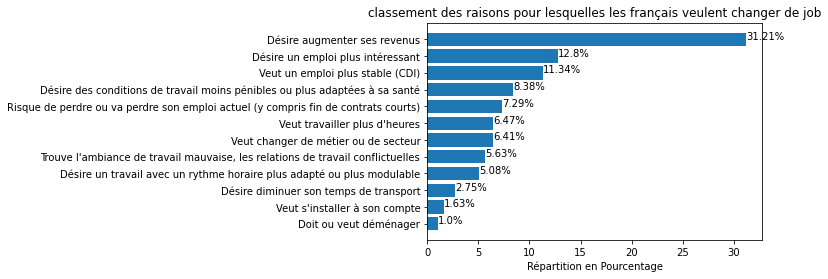

In [ ]:
plt.title("classement des raisons pour lesquelles les français veulent changer de job")
plt.barh(chart_data.index[:-1], repartition)
plt.xlabel("Répartition en Pourcentage")


for i in range(len(repartition)):
    plt.text(repartition[i], chart_data.index[:-1][i],'{}%'.format(repartition[i]))
    
plt.show()

* Let's end this exercise by looking at the distribution of desired hours for those looking for part-time work. To do this, use the HREC column. 

  * First try to simply create a histogram without the density function. 
  * To create the density function, you will need to use the following formula: 
      ```y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))```
     
     where *mu* is the mean of the distribution and *sigma* is the standard deviation.  You can help yourself with this tutorial [histogram with Density](https://matplotlib.org/3.1.1/gallery/statistics/histogram_features.html)

In [ ]:
num_bins=len(dataset['HREC'].value_counts())

In [ ]:
plt.hist?

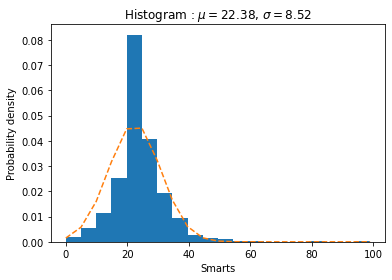

In [ ]:
mu = dataset['HREC'].mean()  # mean of distribution
sigma = dataset['HREC'].std()  # standard deviation of distribution

plt.figure()

# the histogram of the data
n, bins, patches = plt.hist(dataset['HREC'], 20, density=True)

# Formule pour la densité
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

plt.plot(bins, y, '--')
plt.xlabel('Smarts')
plt.ylabel('Probability density')
plt.title(r'Histogram : $\mu={}$, $\sigma={}$'.format(np.round(mu,2), np.round(sigma,2)))
plt.show()